<a href="https://colab.research.google.com/github/adeliapebriani/Classification-and-Regression-Tree/blob/main/Classification_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LIB**

Import Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve,auc,accuracy_score
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
! pip install -q scikit-plot
import scikitplot as skplt

### **1. DATASET**

Load Dataset dari UCI Machine Learning yang telah di simpan di github

In [2]:
filename = 'https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Dataset/thyroid0387.data' #load data
data = pd.read_csv(filename, names=["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","query hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","TSH","T3 measured","T3","TT4 measured","TT4","T4U measured","T4U","FTI measured","FTI","TBG measured","TBG","referral source","label"])
data.head(10) #menampilkan 10 data pertama

age sex on thyroxine  ... TBG referral source         label
0   29   F            f  ...   ?           other  -[840801013]
1   29   F            f  ...   ?           other  -[840801014]
2   41   F            f  ...  11           other  -[840801042]
3   36   F            f  ...  26           other  -[840803046]
4   32   F            f  ...  36           other  S[840803047]
5   60   F            f  ...  26           other  -[840803048]
6   77   F            f  ...  21           other  -[840803068]
7   28   F            f  ...   ?             SVI  -[840807019]
8   28   F            f  ...   ?           other  -[840808060]
9   28   F            f  ...   ?           other  -[840808073]

[10 rows x 30 columns]

### **2. PREPROCESSING**

Mengubah Label menjadi Kategori dimana 
0 = Normal
1 = Hiper
2 = Hipo

sedangkan 3 adalah label yang akan dibuang

In [3]:
for i in range(0, len(data['label'])):
  if '-' in data['label'][i]:
    data['label'][i]= 0
  elif 'I' in data['label'][i]:
     data['label'][i]= 3
  elif 'J' in data['label'][i]:
     data['label'][i]= 3
  elif 'K' in data['label'][i]:
     data['label'][i]= 3
  elif 'L' in data['label'][i]:
     data['label'][i]= 3
  elif 'M' in data['label'][i]:
     data['label'][i]= 3
  elif 'N' in data['label'][i]:
     data['label'][i]= 3
  elif 'O' in data['label'][i]:
     data['label'][i]= 3
  elif 'P' in data['label'][i]:
     data['label'][i]= 3
  elif 'Q' in data['label'][i]:
     data['label'][i]= 3
  elif 'R' in data['label'][i]:
     data['label'][i]= 3
  elif 'S' in data['label'][i]:
     data['label'][i]= 3
  elif 'T' in data['label'][i]:
     data['label'][i]= 3
  
    
  elif 'A' in data['label'][i]:
     data['label'][i]= 1
  elif 'B' in data['label'][i]:
     data['label'][i]= 1
  elif 'C' in data['label'][i]:
     data['label'][i]= 1
  elif 'D' in data['label'][i]:
     data['label'][i]= 1    
     
  elif 'E' in data['label'][i]:
     data['label'][i]= 2
  elif 'F' in data['label'][i]:
     data['label'][i]= 2
  elif 'G' in data['label'][i]:
     data['label'][i]= 2
  elif 'H' in data['label'][i]:
     data['label'][i]= 2
data.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-p

age sex on thyroxine  ... TBG referral source label
0   29   F            f  ...   ?           other     0
1   29   F            f  ...   ?           other     0
2   41   F            f  ...  11           other     0
3   36   F            f  ...  26           other     0
4   32   F            f  ...  36           other     3
5   60   F            f  ...  26           other     0
6   77   F            f  ...  21           other     0
7   28   F            f  ...   ?             SVI     0
8   28   F            f  ...   ?           other     0
9   28   F            f  ...   ?           other     0

[10 rows x 30 columns]

In [4]:
data = data[data.label != 3]

Merupah nilai F dan M dengan integer F=0, dan M=1

Replace missing value pada atribut Sex, '?' diganti dengan 0

In [5]:
print("Jumlah kemunculan nilai pada atribut sex: \n", data['sex'].value_counts())
data['sex'] = data['sex'].replace('F', 0)
data['sex'] = data['sex'].replace('M', 1)
data['sex'] = data['sex'].replace('?', 0)
print("Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: \n", data['sex'].value_counts())

Jumlah kemunculan nilai pada atribut sex: 
 F    4900
M    2396
?     250
Name: sex, dtype: int64
Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: 
 0    5150
1    2396
Name: sex, dtype: int64


Mengganti value pada setiap atribut sehingga bertype integer dengan ketentuan 
False = 0 , True = 1

In [8]:
print("Jumlah kemunculan nilai pada atribut on thyroxine: \n", data['on thyroxine'].value_counts())
data['on thyroxine'] = data['on thyroxine'].replace('f', 0)
data['on thyroxine'] = data['on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query on thyroxine: \n", data['query on thyroxine'].value_counts())
data['query on thyroxine'] = data['query on thyroxine'].replace('f', 0)
data['query on thyroxine'] = data['query on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut on antithyroid medication: \n", data['on antithyroid medication'].value_counts())
data['on antithyroid medication'] = data['on antithyroid medication'].replace('f', 0)
data['on antithyroid medication'] = data['on antithyroid medication'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut sick: \n", data['sick'].value_counts())
data['sick'] = data['sick'].replace('f', 0)
data['sick'] = data['sick'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut pregnant: \n", data['pregnant'].value_counts())
data['pregnant'] = data['pregnant'].replace('f', 0)
data['pregnant'] = data['pregnant'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut thyroid surgery: \n", data['thyroid surgery'].value_counts())
data['thyroid surgery'] = data['thyroid surgery'].replace('f', 0)
data['thyroid surgery'] = data['thyroid surgery'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut I131 treatment: \n", data['I131 treatment'].value_counts())
data['I131 treatment'] = data['I131 treatment'].replace('f', 0)
data['I131 treatment'] = data['I131 treatment'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hypothyroid: \n", data['query hypothyroid'].value_counts())
data['query hypothyroid'] = data['query hypothyroid'].replace('f', 0)
data['query hypothyroid'] = data['query hypothyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hyperthyroid: \n", data['query hyperthyroid'].value_counts())
data['query hyperthyroid'] = data['query hyperthyroid'].replace('f', 0)
data['query hyperthyroid'] = data['query hyperthyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut lithium: \n", data['lithium'].value_counts())
data['lithium'] = data['lithium'].replace('f', 0)
data['lithium'] = data['lithium'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut goitre: \n", data['goitre'].value_counts())
data['goitre'] = data['goitre'].replace('f', 0)
data['goitre'] = data['goitre'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut tumor: \n", data['tumor'].value_counts())
data['tumor'] = data['tumor'].replace('f', 0)
data['tumor'] = data['tumor'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut hypopituitary: \n", data['hypopituitary'].value_counts())
data['hypopituitary'] = data['hypopituitary'].replace('f', 0)
data['hypopituitary'] = data['hypopituitary'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut psych: \n", data['psych'].value_counts())
data['psych'] = data['psych'].replace('f', 0)
data['psych'] = data['psych'].replace('t', 1)

Jumlah kemunculan nilai pada atribut on thyroxine: 
 f    6699
t     847
Name: on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut query on thyroxine: 
 f    7423
t     123
Name: query on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut on antithyroid medication: 
 f    7454
t      92
Name: on antithyroid medication, dtype: int64


Jumlah kemunculan nilai pada atribut sick: 
 f    7266
t     280
Name: sick, dtype: int64


Jumlah kemunculan nilai pada atribut pregnant: 
 f    7513
t      33
Name: pregnant, dtype: int64


Jumlah kemunculan nilai pada atribut thyroid surgery: 
 f    7440
t     106
Name: thyroid surgery, dtype: int64


Jumlah kemunculan nilai pada atribut I131 treatment: 
 f    7406
t     140
Name: I131 treatment, dtype: int64


Jumlah kemunculan nilai pada atribut query hypothyroid: 
 f    7046
t     500
Name: query hypothyroid, dtype: int64


Jumlah kemunculan nilai pada atribut query hyperthyroid: 
 f    6990
t     556
Name: query hyperthyroi

Merubah '?' menjadi Null pada setiap atribut

In [6]:
data = data.replace('?', np.nan)

In [7]:
data.isnull().sum() #menampilkan jumlah nilai null dari tiap atribut

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           722
T3 measured                     0
T3                           2209
TT4 measured                    0
TT4                           354
T4U measured                    0
T4U                           676
FTI measured                    0
FTI                           669
TBG measured                    0
TBG                          7287
referral source                 0
label         

In [9]:
print("Jumlah kemunculan nilai pada atribut label: \n", data['label'].value_counts())

Jumlah kemunculan nilai pada atribut label: 
 0    6771
2     593
1     182
Name: label, dtype: int64


Membuang Kolom yang tidak berpengaruh atau yang tidak digunakan

In [12]:
data.drop('TBG measured', inplace=True, axis=1)
data.drop('T4U measured', inplace=True, axis=1)
data.drop('TSH measured', inplace=True, axis=1)
data.drop('FTI measured', inplace=True, axis=1)
data.drop('T3 measured', inplace=True, axis=1)
data.drop('TT4 measured', inplace=True, axis=1)
data.drop('referral source', inplace=True, axis=1)
data.drop('hypopituitary', inplace=True, axis=1)
data.drop('TBG', inplace=True, axis=1)

In [13]:
data.head(10)


age  sex  on thyroxine  query on thyroxine  ...  TT4  T4U  FTI  label
0    29    0             0                   0  ...  NaN  NaN  NaN      0
1    29    0             0                   0  ...  128  NaN  NaN      0
2    41    0             0                   0  ...  NaN  NaN  NaN      0
3    36    0             0                   0  ...  NaN  NaN  NaN      0
5    60    0             0                   0  ...  NaN  NaN  NaN      0
6    77    0             0                   0  ...  NaN  NaN  NaN      0
7    28    0             0                   0  ...  116  NaN  NaN      0
8    28    0             0                   0  ...   76  NaN  NaN      0
9    28    0             0                   0  ...   83  NaN  NaN      0
10   54    0             0                   0  ...  133  NaN  NaN      0

[10 rows x 21 columns]

Mengganti atribut missing value pada data continious menggunakan mean, namun sebelumnya data diubah menjadi float

In [14]:
column = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in range(0, len(column)):
  data[column[i]] = data[column[i]].astype(float)

In [15]:

mean = data["age"].mean()
data["age"] = data["age"].replace(np.nan, mean)

mean = data["TSH"].mean()
data["TSH"] = data["TSH"].replace(np.nan, mean)


mean = data["T3"].mean()
data["T3"] = data["T3"].replace(np.nan, mean)
data

mean = data["TT4"].mean()
data["TT4"] = data["TT4"].replace(np.nan, mean)

mean = data["T4U"].mean()
data["T4U"] = data["T4U"].replace(np.nan, mean)

mean = data["FTI"].mean()
data["FTI"] = data["FTI"].replace(np.nan, mean)



data

age  sex  on thyroxine  ...       T4U         FTI  label
0     29.0    0             0  ...  0.967322  110.571745      0
1     29.0    0             0  ...  0.967322  110.571745      0
2     41.0    0             0  ...  0.967322  110.571745      0
3     36.0    0             0  ...  0.967322  110.571745      0
5     60.0    0             0  ...  0.967322  110.571745      0
...    ...  ...           ...  ...       ...         ...    ...
9166  70.0    0             0  ...  0.740000  119.000000      0
9167  56.0    1             0  ...  0.830000   77.000000      0
9168  22.0    1             0  ...  0.920000   99.000000      0
9170  47.0    0             0  ...  0.850000   88.000000      0
9171  31.0    1             0  ...  1.020000   65.000000      0

[7546 rows x 21 columns]

membuang data yang sama

In [16]:
data = data.drop_duplicates()

In [17]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
label                        0
dtype: int64

In [20]:
data.describe()

age          sex  ...          FTI        label
count   7460.000000  7460.000000  ...  7460.000000  7460.000000
mean      78.391287     0.319571  ...   110.574043     0.183378
std     1312.755223     0.466342  ...    35.137907     0.555674
min        1.000000     0.000000  ...     1.400000     0.000000
25%       37.000000     0.000000  ...    95.000000     0.000000
50%       55.000000     0.000000  ...   110.000000     0.000000
75%       67.000000     1.000000  ...   123.000000     0.000000
max    65526.000000     1.000000  ...   839.000000     2.000000

[8 rows x 21 columns]

In [21]:
'''print('Normal')
print(len(data.query ('T3<1.2 and label==0')))
print(len(data.query ('T3>=1.2 and T3<=2.8 and label==0')))
print(len(data.query ('T3>2.8 and label==0')))
print('\n')
print('Thyroid')
print(len(data.query ('T3<1.2 and label==1')))
print(len(data.query ('T3>=1.2 and T3<=2.8 and label==1')))
print(len(data.query ('T3>2.8 and label==1')))'''

"print('Normal')\nprint(len(data.query ('T3<1.2 and label==0')))\nprint(len(data.query ('T3>=1.2 and T3<=2.8 and label==0')))\nprint(len(data.query ('T3>2.8 and label==0')))\nprint('\n')\nprint('Thyroid')\nprint(len(data.query ('T3<1.2 and label==1')))\nprint(len(data.query ('T3>=1.2 and T3<=2.8 and label==1')))\nprint(len(data.query ('T3>2.8 and label==1')))"

### **OUTLIERS**

Mendeteksi Data Pencilan menggunakan quantile, lalu menghapus data pencilan tersebut

In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age                          30.00
sex                           1.00
on thyroxine                  0.00
query on thyroxine            0.00
on antithyroid medication     0.00
sick                          0.00
pregnant                      0.00
thyroid surgery               0.00
I131 treatment                0.00
query hypothyroid             0.00
query hyperthyroid            0.00
lithium                       0.00
goitre                        0.00
tumor                         0.00
psych                         0.00
TSH                           2.76
T3                            0.40
TT4                          32.00
T4U                           0.17
FTI                          28.00
label                         0.00
dtype: float64


In [23]:
indexNames = data[data['age'] > 100].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
data.describe()

age          sex  ...          FTI        label
count  7456.000000  7456.000000  ...  7456.000000  7456.000000
mean     52.011132     0.319474  ...   110.570327     0.183476
std      18.629106     0.466304  ...    35.145559     0.555806
min       1.000000     0.000000  ...     1.400000     0.000000
25%      37.000000     0.000000  ...    95.000000     0.000000
50%      55.000000     0.000000  ...   110.000000     0.000000
75%      67.000000     1.000000  ...   123.000000     0.000000
max      97.000000     1.000000  ...   839.000000     2.000000

[8 rows x 21 columns]

### **3. ANALISIS DATA**

In [26]:
#(data['sex']).describe()

count    7456.000000
mean        0.319474
std         0.466304
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [27]:
#data.query('sex==1 and label==0').describe()

age     sex  on thyroxine  ...          T4U          FTI   label
count  2212.000000  2212.0   2212.000000  ...  2212.000000  2212.000000  2212.0
mean     51.272604     1.0      0.070524  ...     0.918629   110.472509     0.0
std      17.937131     0.0      0.256087  ...     0.132704    21.410198     0.0
min       1.000000     1.0      0.000000  ...     0.250000    37.000000     0.0
25%      38.000000     1.0      0.000000  ...     0.830000    97.000000     0.0
50%      54.000000     1.0      0.000000  ...     0.930000   110.000000     0.0
75%      65.000000     1.0      0.000000  ...     1.000000   122.000000     0.0
max      97.000000     1.0      1.000000  ...     1.430000   332.000000     0.0

[8 rows x 21 columns]

Rentang Umur yang terdapat dalam dataset

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


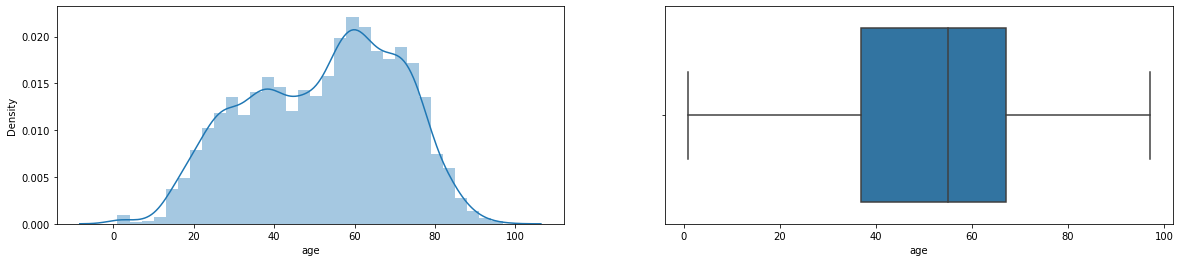

In [25]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(data['age'])

f.add_subplot(1,2,2)
sns.boxplot(data['age'])


Jumlah label dimana 0 = Normal, 1 = Hipertiroid, 2 = Hipotiroid

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


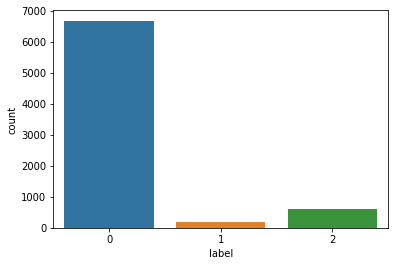

In [27]:
sns.countplot(data['label'])

Confusion Matrix

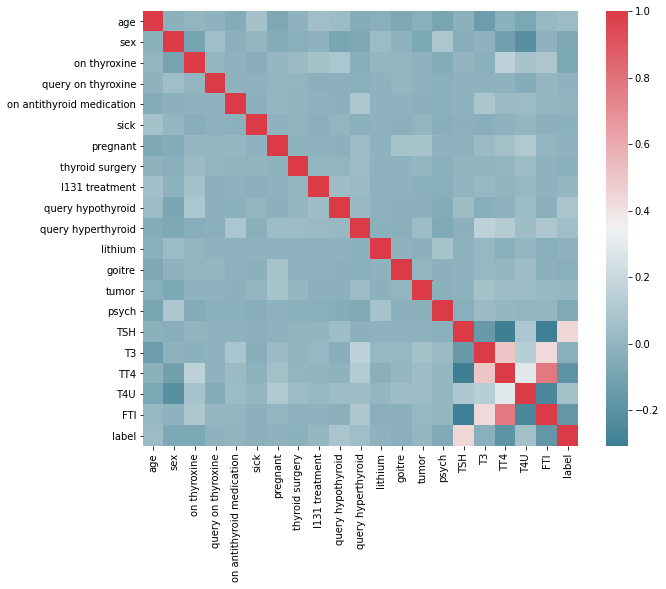

In [26]:


f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


### **4. CART DENGAN GINI INDEX**

Penggunaan Normalisasi Min Max Scaler

In [28]:
X=data.iloc[:,0:20].values
#Label Set

y=data.iloc[:,20].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler_x= scaler.fit_transform(X)
print(scaler_x)
MinMaxScaler()

[[0.29166667 0.         0.         ... 0.24112938 0.40275765 0.13033876]
 [0.29166667 0.         0.         ... 0.29439252 0.40275765 0.13033876]
 [0.41666667 0.         0.         ... 0.24112938 0.40275765 0.13033876]
 ...
 [0.21875    1.         0.         ... 0.20794393 0.37823834 0.1165234 ]
 [0.47916667 0.         0.         ... 0.17056075 0.34196891 0.10339064]
 [0.3125     1.         0.         ... 0.14953271 0.43005181 0.07593123]]


MinMaxScaler(copy=True, feature_range=(0, 1))

Pembangunan Model Tree dengan datatrain = 85 dan datates = 15

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

model=DecisionTreeClassifier(criterion='gini', splitter='best',random_state=42)
'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model.fit(X_train,y_train)

y_trained = model.predict(X_train)

y_tested = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))

print('Accuracy Score train     : '  + str(accuracy_score(y_train,y_trained)))
print('Accuracy Score test      : '  + str(accuracy_score(y_test,y_tested)*100))
print("Precision Score          : " + str(precision_score(y_test, y_tested,average='macro')*100))
print("Recall Score             : " + str(recall_score(y_test, y_tested,average='macro')*100))
print('F1 Score                 : ' + str(f1_score(y_test,y_tested,average='macro')*100))

Confusion Matrix: 
 [[1001    6    1]
 [   8   25    0]
 [   4    0   74]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1008
           1       0.81      0.76      0.78        33
           2       0.99      0.95      0.97        78

    accuracy                           0.98      1119
   macro avg       0.93      0.90      0.91      1119
weighted avg       0.98      0.98      0.98      1119

Accuracy Score train     : 1.0
Accuracy Score test      : 98.30205540661304
Precision Score          : 92.70907591985197
Recall Score             : 89.97830872830873
F1 Score                 : 91.30563249820241


Confusion Matrix yang berbentuk Persentase

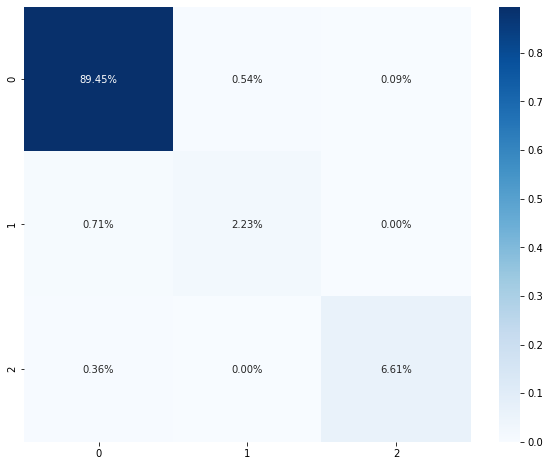

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', ax=ax)

Hasil dari Pohon Klasifikasi Maksimal

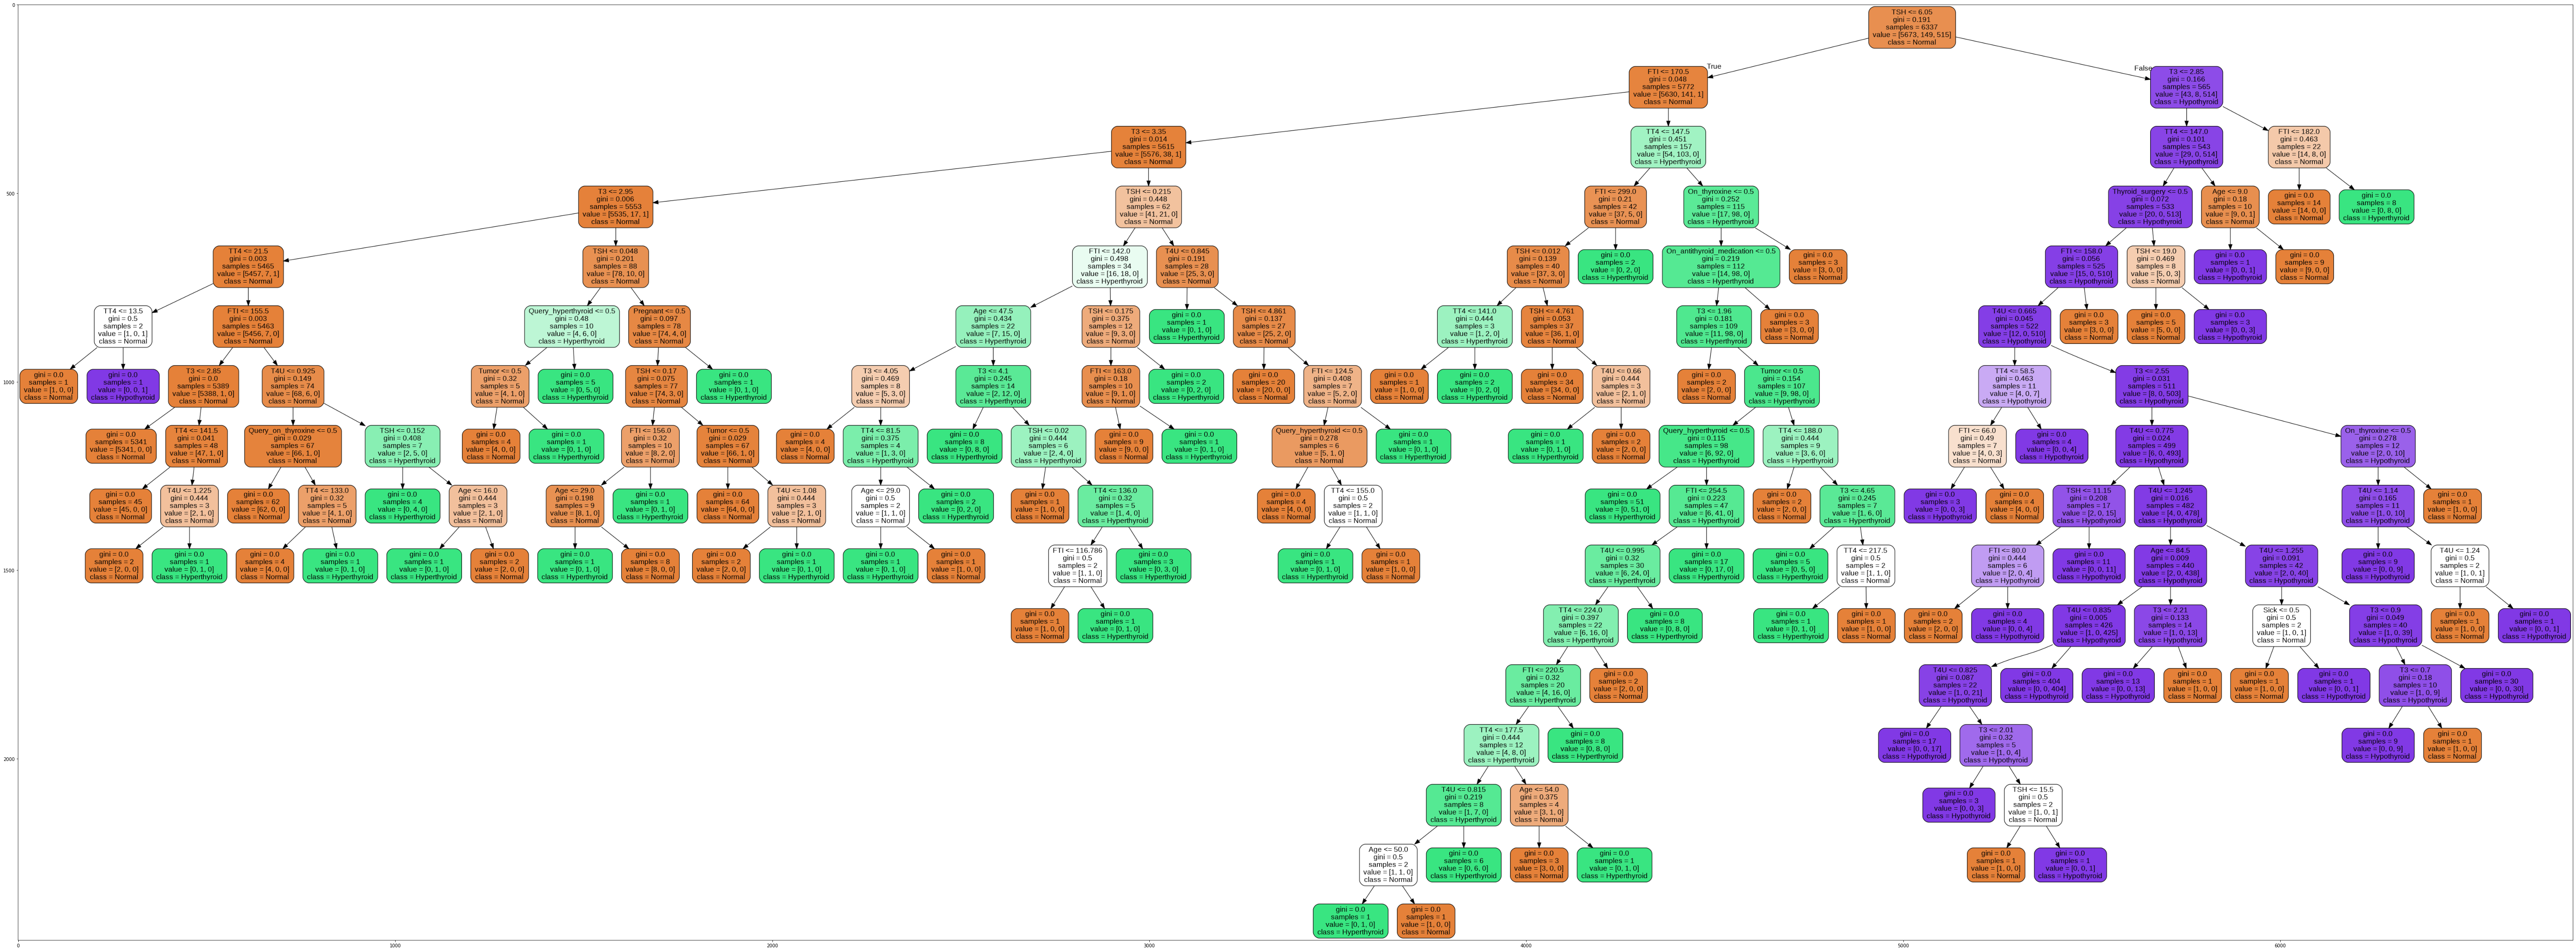

In [36]:
rt = model.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True,rounded=True, class_names =['Normal','Hyperthyroid','Hypothyroid'],label='all', feature_names=['Age','Sex','On_thyroxine','Query_on_thyroxine','On_antithyroid_medication',
                                                                                                       'Sick','Pregnant','Thyroid_surgery','I131_treatment','Query_hypothyroid',
                                                                                                       'Query_hyperthyroid','Lithium','Goitre','Tumor','Psych','TSH','T3','TT4','T4U','FTI'])

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

## **5. TREE PRUNING**

Mencari nilai alpha

In [33]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(ccp_alphas)

[0.00000000e+00 7.87164733e-05 1.05182730e-04 1.18352533e-04
 1.26242702e-04 1.31502814e-04 1.33869221e-04 1.35260037e-04
 1.38077955e-04 1.43457615e-04 1.44277373e-04 1.53538421e-04
 1.55448103e-04 1.55448103e-04 1.57803377e-04 1.60725662e-04
 1.89292062e-04 1.99678318e-04 2.10404503e-04 2.10404503e-04
 2.14506777e-04 2.40462289e-04 2.52485403e-04 2.60918282e-04
 2.76660050e-04 2.84046079e-04 2.84046079e-04 2.87756008e-04
 3.55057598e-04 3.58327398e-04 3.73502149e-04 4.01681323e-04
 4.11528485e-04 4.26069118e-04 4.28815896e-04 4.56954699e-04
 5.04970806e-04 5.14363865e-04 5.19778319e-04 5.91762664e-04
 5.93383744e-04 7.25429740e-04 8.64111444e-04 8.91651101e-04
 1.60672529e-03 2.17897260e-03 2.30445514e-03 4.56468474e-03
 5.21856814e-03 2.03150936e-02 1.32869763e-01]


Membangun Pohon untuk setiap nilai ccp_alpha

In [48]:
tree_list = []
accuracy_train,accuracy_test=[],[]

for alpha in ccp_alphas:
    tree1 = DecisionTreeClassifier(criterion='gini',random_state=42,ccp_alpha=alpha, splitter='best')
    tree1.fit(X_train,y_train)
    #y_trained=tree1.predict(X_train)
    #y_tested=tree1.predict(X_test)
    tree_list.append(tree1)

    #accuracy_train.append(accuracy_score(y_train,y_trained))
    #accuracy_test.append(accuracy_score(y_test,y_tested))

#print(accuracy_train)
#print(accuracy_test)

In [49]:
training_score = [model.score(X_train,y_train) for model in tree_list]
testing_score = [model.score(X_test,y_test) for model in tree_list]

print(training_score)
print(testing_score)

[1.0, 0.9998421966230078, 0.9996843932460154, 0.9995265898690232, 0.999368786492031, 0.9992109831150386, 0.9987375729840618, 0.9985797696070696, 0.9984219662300773, 0.9982641628530851, 0.9981063594760928, 0.9979485560991005, 0.997632949345116, 0.997632949345116, 0.9974751459681237, 0.9973173425911315, 0.9968439324601547, 0.9965283257061701, 0.9962127189521855, 0.9962127189521855, 0.9954237020672242, 0.995265898690232, 0.9951080953132397, 0.9949502919362474, 0.994634685182263, 0.9943190784282784, 0.9943190784282784, 0.9941612750512862, 0.9938456682973016, 0.9936878649203092, 0.9933722581663248, 0.9927410446583557, 0.9927410446583557, 0.9924254379043711, 0.9919520277733943, 0.9910052075114407, 0.9905317973804639, 0.9902161906264794, 0.9899005838724949, 0.9894271737415181, 0.9891115669875336, 0.98816474672558, 0.9878491399715954, 0.987060123086634, 0.9857976960706959, 0.9857976960706959, 0.9845352690547577, 0.982326021776866, 0.9772763137131134, 0.9695439482404924, 0.8952185576771343]
[0.

In [44]:
model_list = pd.DataFrame({'alpha':ccp_alphas,'train score':training_score,'test score':testing_score})
model_list['score diff'] = model_list['train score'] - model_list['test score']

In [50]:
model_list.shape

(51, 4)

In [51]:
model_list.head()

alpha  train score  test score  score diff
0  0.000000     1.000000    0.983021    0.016979
1  0.000079     0.999842    0.983914    0.015928
2  0.000105     0.999684    0.983914    0.015770
3  0.000118     0.999527    0.983914    0.015612
4  0.000126     0.999369    0.983021    0.016348

In [52]:
model_list[model_list['score diff']==model_list['score diff'].min()]

alpha  train score  test score  score diff
50  0.13287     0.895219    0.900804   -0.005586

Mencari nilai alpha terbaik berdasarkan hasil train dan test score

In [53]:
model_list[model_list['test score']==model_list['test score'].max()]

alpha  train score  test score  score diff
15  0.000161     0.997317    0.988382    0.008935
16  0.000189     0.996844    0.988382    0.008461
21  0.000240     0.995266    0.988382    0.006883
22  0.000252     0.995108    0.988382    0.006726
23  0.000261     0.994950    0.988382    0.006568
24  0.000277     0.994635    0.988382    0.006252
28  0.000355     0.993846    0.988382    0.005463
29  0.000358     0.993688    0.988382    0.005305
36  0.000505     0.990532    0.988382    0.002149
37  0.000514     0.990216    0.988382    0.001834
38  0.000520     0.989901    0.988382    0.001518

Melakukan Proses Learning dengan ccp_alpha, dimana akan menghasilkan model Pohon Klasifikasi Optimal

In [54]:
model_pruned=DecisionTreeClassifier(ccp_alpha=0.000161, criterion='gini',splitter='best',random_state=42)

'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
y_tested = model_pruned.predict(X_test)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))

print('Accuracy Score train     : '  + str(accuracy_score(y_train,y_trained)))
print('Accuracy Score test      : '  + str(accuracy_score(y_test,y_tested)))
print('\n')
print("Precision Score macro         : " + str(precision_score(y_test, y_tested,average='macro')))
print("Recall Score    macro         : " + str(recall_score(y_test, y_tested,average='macro')))
print('F1 Score        macro         : ' + str(f1_score(y_test,y_tested,average='macro')))
print('\n')
print("Precision Score weighted      : " + str(precision_score(y_test, y_tested,average='weighted')))
print("Recall Score    weighted      : " + str(recall_score(y_test, y_tested,average='weighted')))
print('F1 Score        weighted      : ' + str(f1_score(y_test,y_tested,average='weighted')))

Confusion Matrix: 
 [[1003    4    1]
 [   7   26    0]
 [   1    0   77]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1008
           1       0.87      0.79      0.83        33
           2       0.99      0.99      0.99        78

    accuracy                           0.99      1119
   macro avg       0.95      0.92      0.94      1119
weighted avg       0.99      0.99      0.99      1119

Accuracy Score train     : 0.9973173425911315
Accuracy Score test      : 0.9883824843610366


Precision Score macro         : 0.9486443987927667
Recall Score    macro         : 0.9233659858659858
F1 Score        macro         : 0.9353791604906018


Precision Score weighted      : 0.9880462367045607
Recall Score    weighted      : 0.9883824843610366
F1 Score        weighted      : 0.9881570629890545


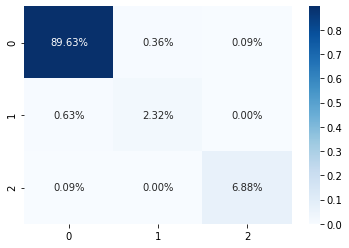

In [55]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')

Plot Pohon Klasifikasi Optimal

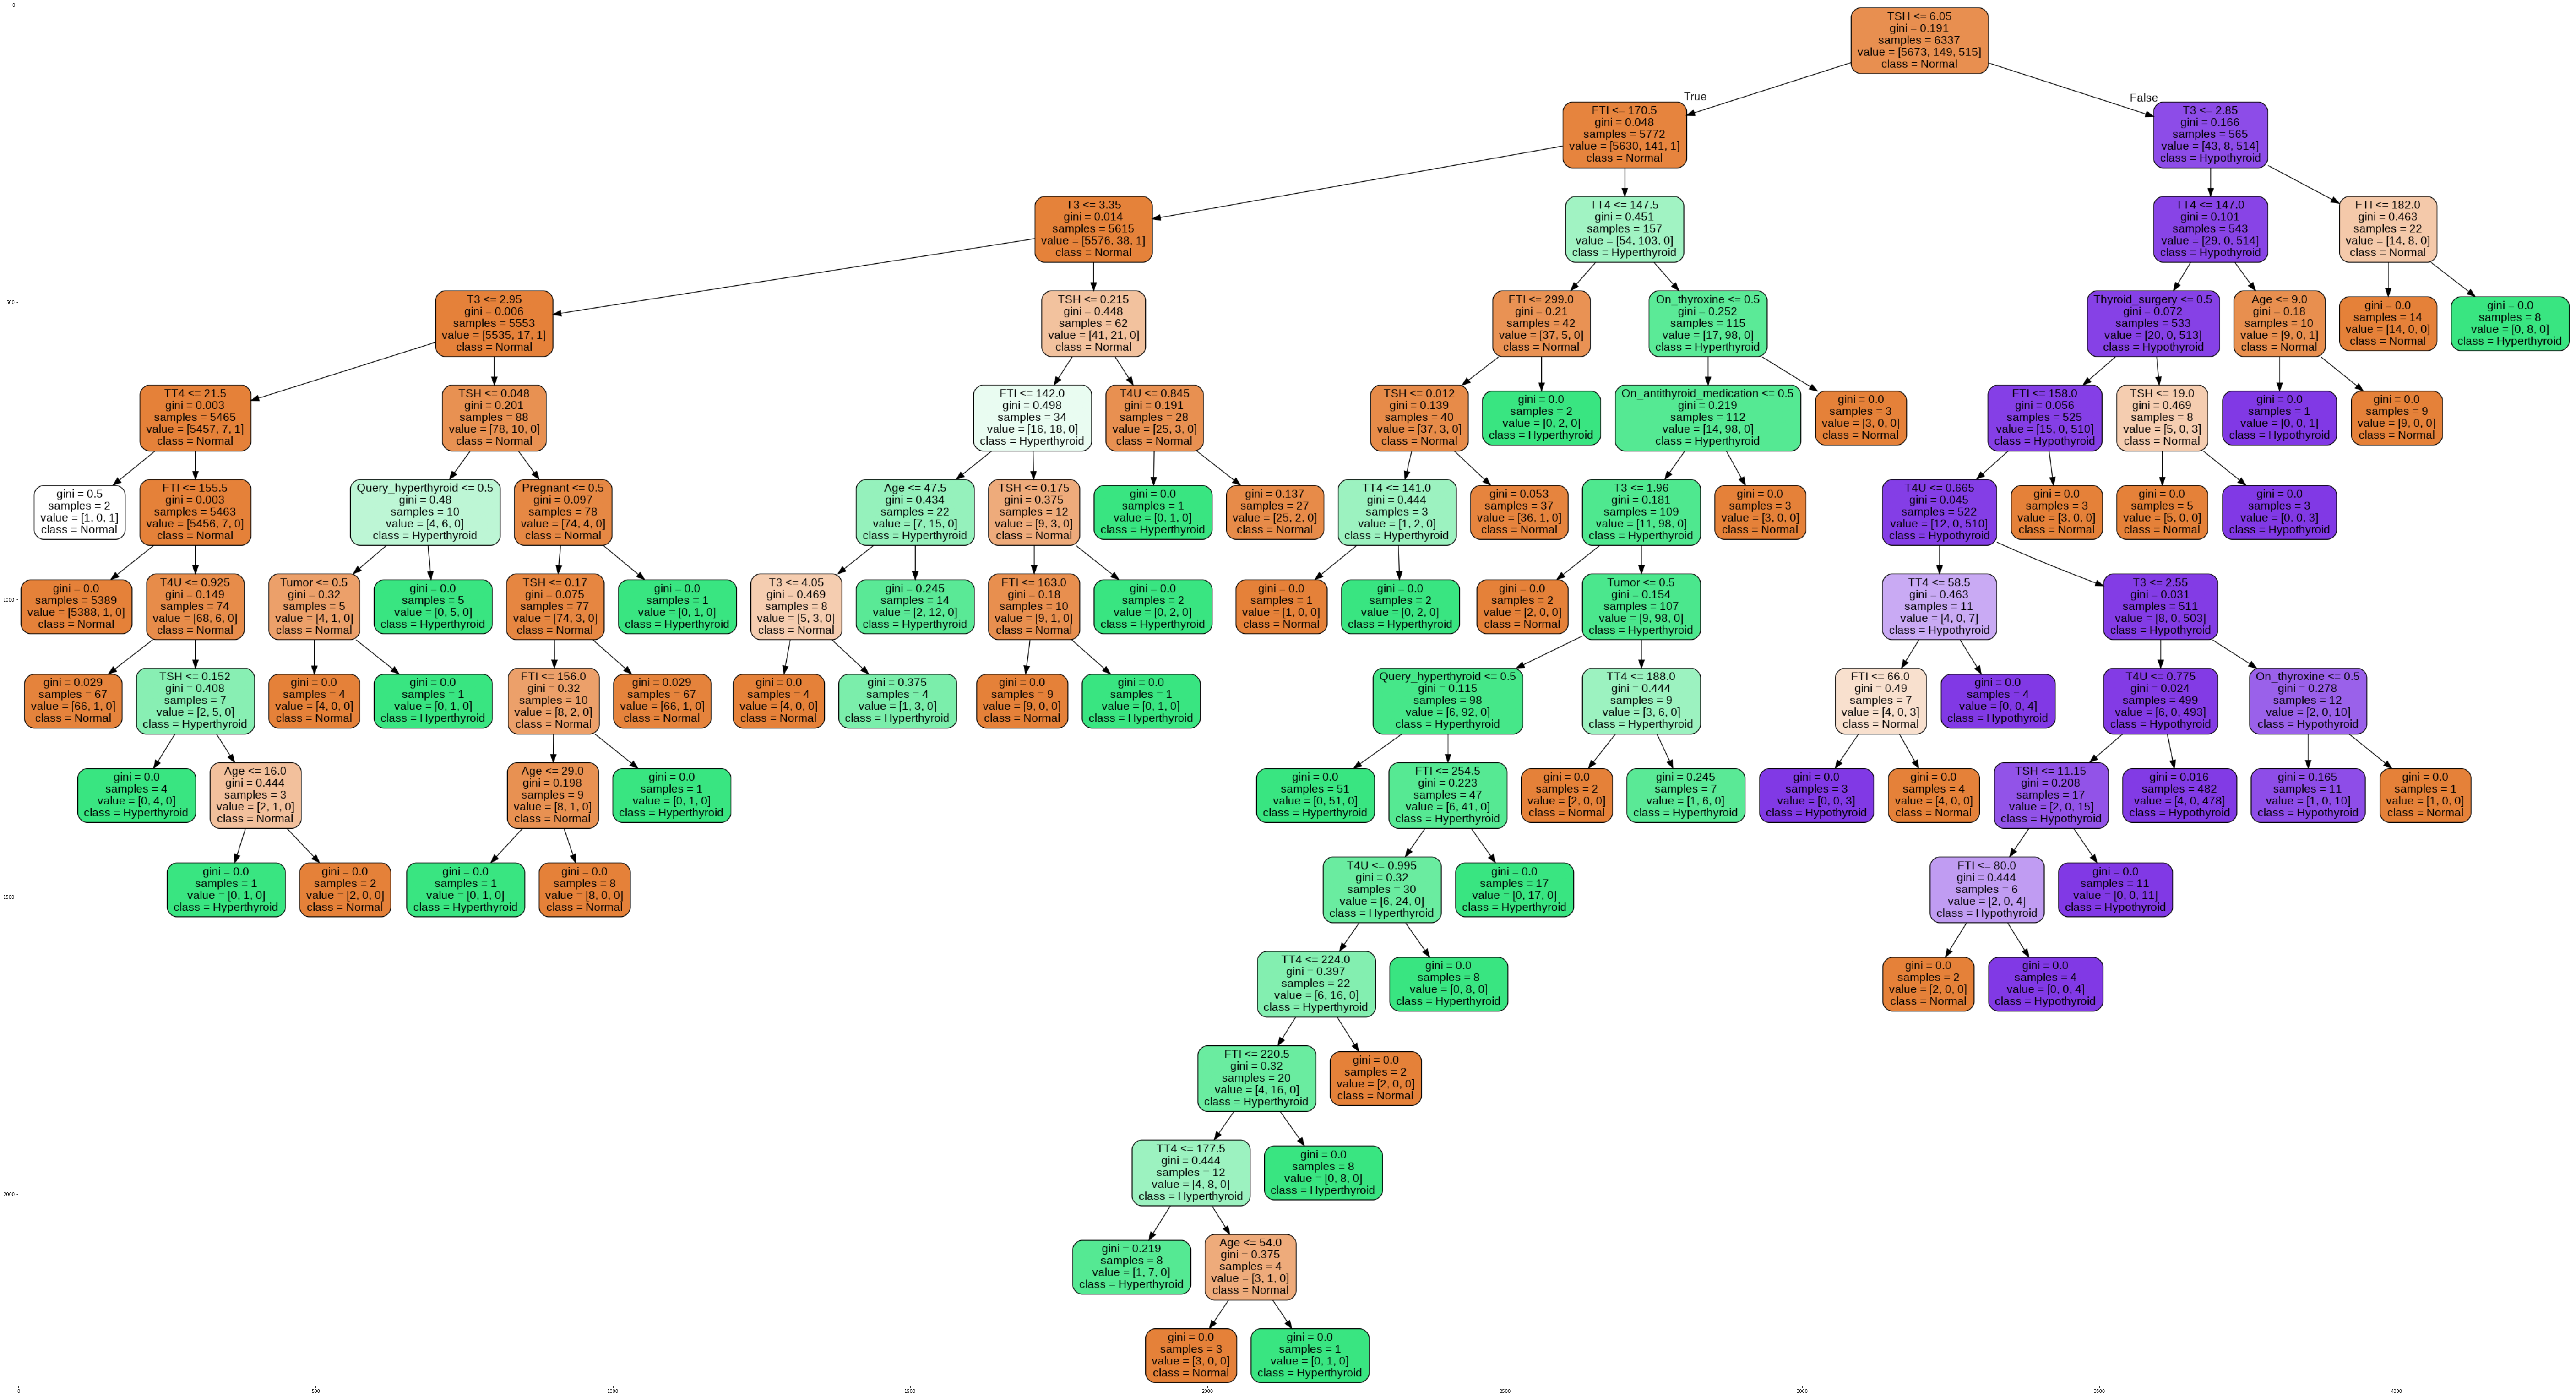

In [56]:

rt = model_pruned.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True,impurity=True,rounded=True, class_names =['Normal','Hyperthyroid','Hypothyroid'],label='all', feature_names=['Age','Sex','On_thyroxine','Query_on_thyroxine','On_antithyroid_medication',
                                                                                                       'Sick','Pregnant','Thyroid_surgery','I131_treatment','Query_hypothyroid',
                                                                                                       'Query_hyperthyroid','Lithium','Goitre','Tumor','Psych','TSH','T3','TT4','T4U','FTI'])

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('1.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('1.png')
imgplot = plt.imshow(img)

plt.show()

In [58]:
'''print("DecisionTree Feature ranking:")

importance = model_pruned.feature_importances_
indices = np.argsort(importance)[::-1]

X=data.iloc[:,0:20].values

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, data.columns[indices[f]], importance[indices[f]]))

plt.figure(figsize=(30,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importance[indices], color="y", align="center")
plt.xticks(range(X.shape[1]), data.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()'''

'print("DecisionTree Feature ranking:")\n\nimportance = model_pruned.feature_importances_\nindices = np.argsort(importance)[::-1]\n\nX=data.iloc[:,0:20].values\n\nfor f in range(X.shape[1]):\n    print("%d. feature %s (%f)" % (f + 1, data.columns[indices[f]], importance[indices[f]]))\n\nplt.figure(figsize=(30,5))\nplt.title("DecisionTree Feature importances")\nplt.bar(range(X.shape[1]), importance[indices], color="y", align="center")\nplt.xticks(range(X.shape[1]), data.columns[indices])\nplt.xlim([-1, X.shape[1]])\nplt.show()'